# **Классификация с помощью логистической регрессии**

**Выполнил студент ФИО**

# 1.Выберете набор данных для Классификации

Выполните импорт данных. Оцените типы имеющихся данных, проверьте наличие дубликатов и/или пропущенных значений.

* Import библиотек

In [81]:
import pandas as pd # Библиотека Pandas для работы с табличными данными
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего
import matplotlib.pyplot as plt # библиотека MatPlotLib для визуализации
import seaborn as sns; sns.set() # библиотека Seaborn для визуализации данных из Pandas

from sklearn.model_selection import train_test_split #  функция разбиения на тренировочную и тестовую выборку
# но в исполнении scikit-learn
from sklearn.impute import SimpleImputer # Объект для замены пропущенных значений
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler # Импортируем нормализацию и One-Hot Encoding от scikit-learn
from sklearn import preprocessing as prep  # общий модуль предварительной обработки scikit-learn
from sklearn import set_config # для доп настроек

from sklearn.pipeline import Pipeline # Pipeline - суперпомощник автоматизации обработки данных
from sklearn.compose import ColumnTransformer # т.н. преобразователь колонок

from sklearn.model_selection import cross_validate # функция кросс-валидации от Scikit-learn

from sklearn.model_selection import ShuffleSplit # при кросс-валидации случайно перемешиваем данные

from sklearn.metrics import mean_squared_error as mse # метрика MSE от Scikit-learn
from sklearn.metrics import r2_score # коэффициент детерминации  от Scikit-learn


from sklearn.metrics import r2_score, f1_score, mean_squared_error, mean_absolute_error, accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.linear_model import LogisticRegression # Логистичекая регрессия от scikit-learn
from sklearn.preprocessing import PolynomialFeatures # Объект для генерации полиномиальных признаков от scikit-learn

RANDOM_STATE = 42
import warnings
warnings.filterwarnings('ignore')

* Загрузка и считывание датасета

Ссылка на датасет - https://www.kaggle.com/datasets/alexandrududa/cars-moldova

In [82]:
df = pd.read_csv("Books_Data_Clean.csv", delimiter = ',')
df

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.00,20496.000,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.50,7462.500,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.00,28677.000,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.00,24750.000,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.50,22771.500,7.99,4,Penguin Group (USA) LLC,4750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,1065,2014.0,Gray Mountain,John Grisham,eng,Intermediate,3.52,37379,nonfiction,104.94,62.964,0.99,1268,"Amazon Digital Services, Inc.",106
1066,1066,1989.0,The Power of One,Bryce Courtenay,eng,Excellent,4.34,57312,genre fiction,846.94,508.164,7.99,1270,Random House LLC,106
1067,1067,1930.0,The Maltese Falcon,Dashiell Hammett,eng,Intermediate,3.92,58742,genre fiction,846.94,508.164,7.99,1271,Hachette Book Group,106
1068,1068,2011.0,Night Road,Kristin Hannah,en-US,Excellent,4.17,58028,genre fiction,104.94,62.964,0.99,1272,"Amazon Digital Services, Inc.",106


In [83]:
df.info() # информация о данных в датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                1070 non-null   int64  
 1   Publishing Year      1069 non-null   float64
 2   Book Name            1047 non-null   object 
 3   Author               1070 non-null   object 
 4   language_code        1017 non-null   object 
 5   Author_Rating        1070 non-null   object 
 6   Book_average_rating  1070 non-null   float64
 7   Book_ratings_count   1070 non-null   int64  
 8   genre                1070 non-null   object 
 9   gross sales          1070 non-null   float64
 10  publisher revenue    1070 non-null   float64
 11  sale price           1070 non-null   float64
 12  sales rank           1070 non-null   int64  
 13  Publisher            1070 non-null   object 
 14  units sold           1070 non-null   int64  
dtypes: float64(5), int64(4), object(6)
mem

In [84]:
df = df.drop_duplicates() # удаляем дубликаты
df = df.reset_index(drop=True) # обновим индексы
df.duplicated().sum()

0

In [85]:
df = df.drop(['index', 'Book Name', 'units sold', 'sales rank', 'publisher revenue'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Publishing Year      1069 non-null   float64
 1   Author               1070 non-null   object 
 2   language_code        1017 non-null   object 
 3   Author_Rating        1070 non-null   object 
 4   Book_average_rating  1070 non-null   float64
 5   Book_ratings_count   1070 non-null   int64  
 6   genre                1070 non-null   object 
 7   gross sales          1070 non-null   float64
 8   sale price           1070 non-null   float64
 9   Publisher            1070 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 83.7+ KB


## 2. Выполните исследовательский анализ данных.

Оцените связь Признаков с целевой переменной (агрегация с помощью метода groupby библиотеки Pandas).

In [86]:
# делим признаки на котегориальные и числовые

cat_columns = [] # создаем пустой список для имен колонок категориальных данных
num_columns = [] # создаем пустой список для имен колонок числовых данных

for column_name in df.columns: # смотрим на все колонки в датафрейме
    if (df[column_name].dtypes == object): # проверяем тип данных для каждой колонки
        cat_columns +=[column_name] # если тип объект - то складываем в категориальные данные
    else:
        num_columns +=[column_name] # иначе - числовые

# важно: если признак категориальный, но хранится в формате числовых данных, тогда код не сработает корректно


# выводим результат
print('Категориальные данные:\t ',cat_columns, '\n Число столблцов = ',len(cat_columns))

print('Числовые данные:\t ',  num_columns, '\n Число столблцов = ',len(num_columns))


Категориальные данные:	  ['Author', 'language_code', 'Author_Rating', 'genre', 'Publisher'] 
 Число столблцов =  5
Числовые данные:	  ['Publishing Year', 'Book_average_rating', 'Book_ratings_count', 'gross sales', 'sale price'] 
 Число столблцов =  5


Удалим зависимые параметры, Age более информативный, поэтому его сгенерируем, а Year удалим.

In [87]:
df['Publishing Year'] = 2024 - df['Publishing Year']
df.rename(columns = {'Publishing Year':'Age'}, inplace = True )
df.head()

,Age,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,sale price,Publisher
0,49.0,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,4.88,HarperCollins Publishers
1,37.0,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,1.99,HarperCollins Publishers
2,9.0,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,8.69,"Amazon Digital Services, Inc."
3,16.0,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,7.50,Hachette Book Group
4,13.0,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,7.99,Penguin Group (USA) LLC


Сразу изменим список числовых признаков.

In [88]:
num_columns[0] = 'Age'

In [89]:
num_columns

['Age',
 'Book_average_rating',
 'Book_ratings_count',
 'gross sales',
 'sale price']

In [90]:
df[cat_columns].nunique()

Author           735
language_code      8
Author_Rating      4
genre              4
Publisher          8
dtype: int64

Выбираем переменную Transmission как целевую.

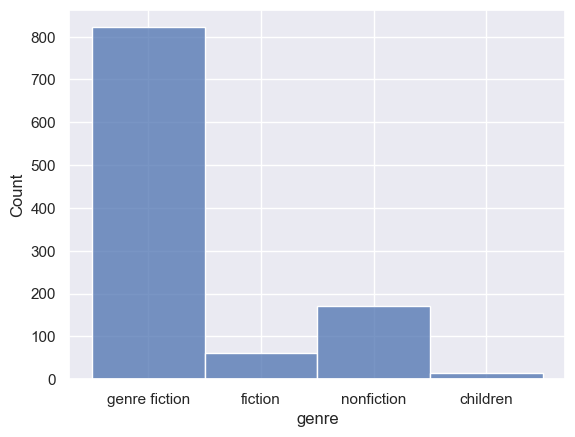

In [91]:
# Посмотрим как выглядит распределение целевой переменной.
target = "genre"
sns.histplot(
    df,
    x=target
)

classification_df=df.copy()

In [92]:
# Группировка по признакам и расчет количества значений целевой переменной
classification_df.groupby('genre').count()

,Age,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,gross sales,sale price,Publisher
genre,,,,,,,,,
children,15,15,15,15,15,15,15,15,15
fiction,62,62,58,62,62,62,62,62,62
genre fiction,822,822,786,822,822,822,822,822,822
nonfiction,170,171,158,171,171,171,171,171,171


<Figure size 1000x1000 with 0 Axes>

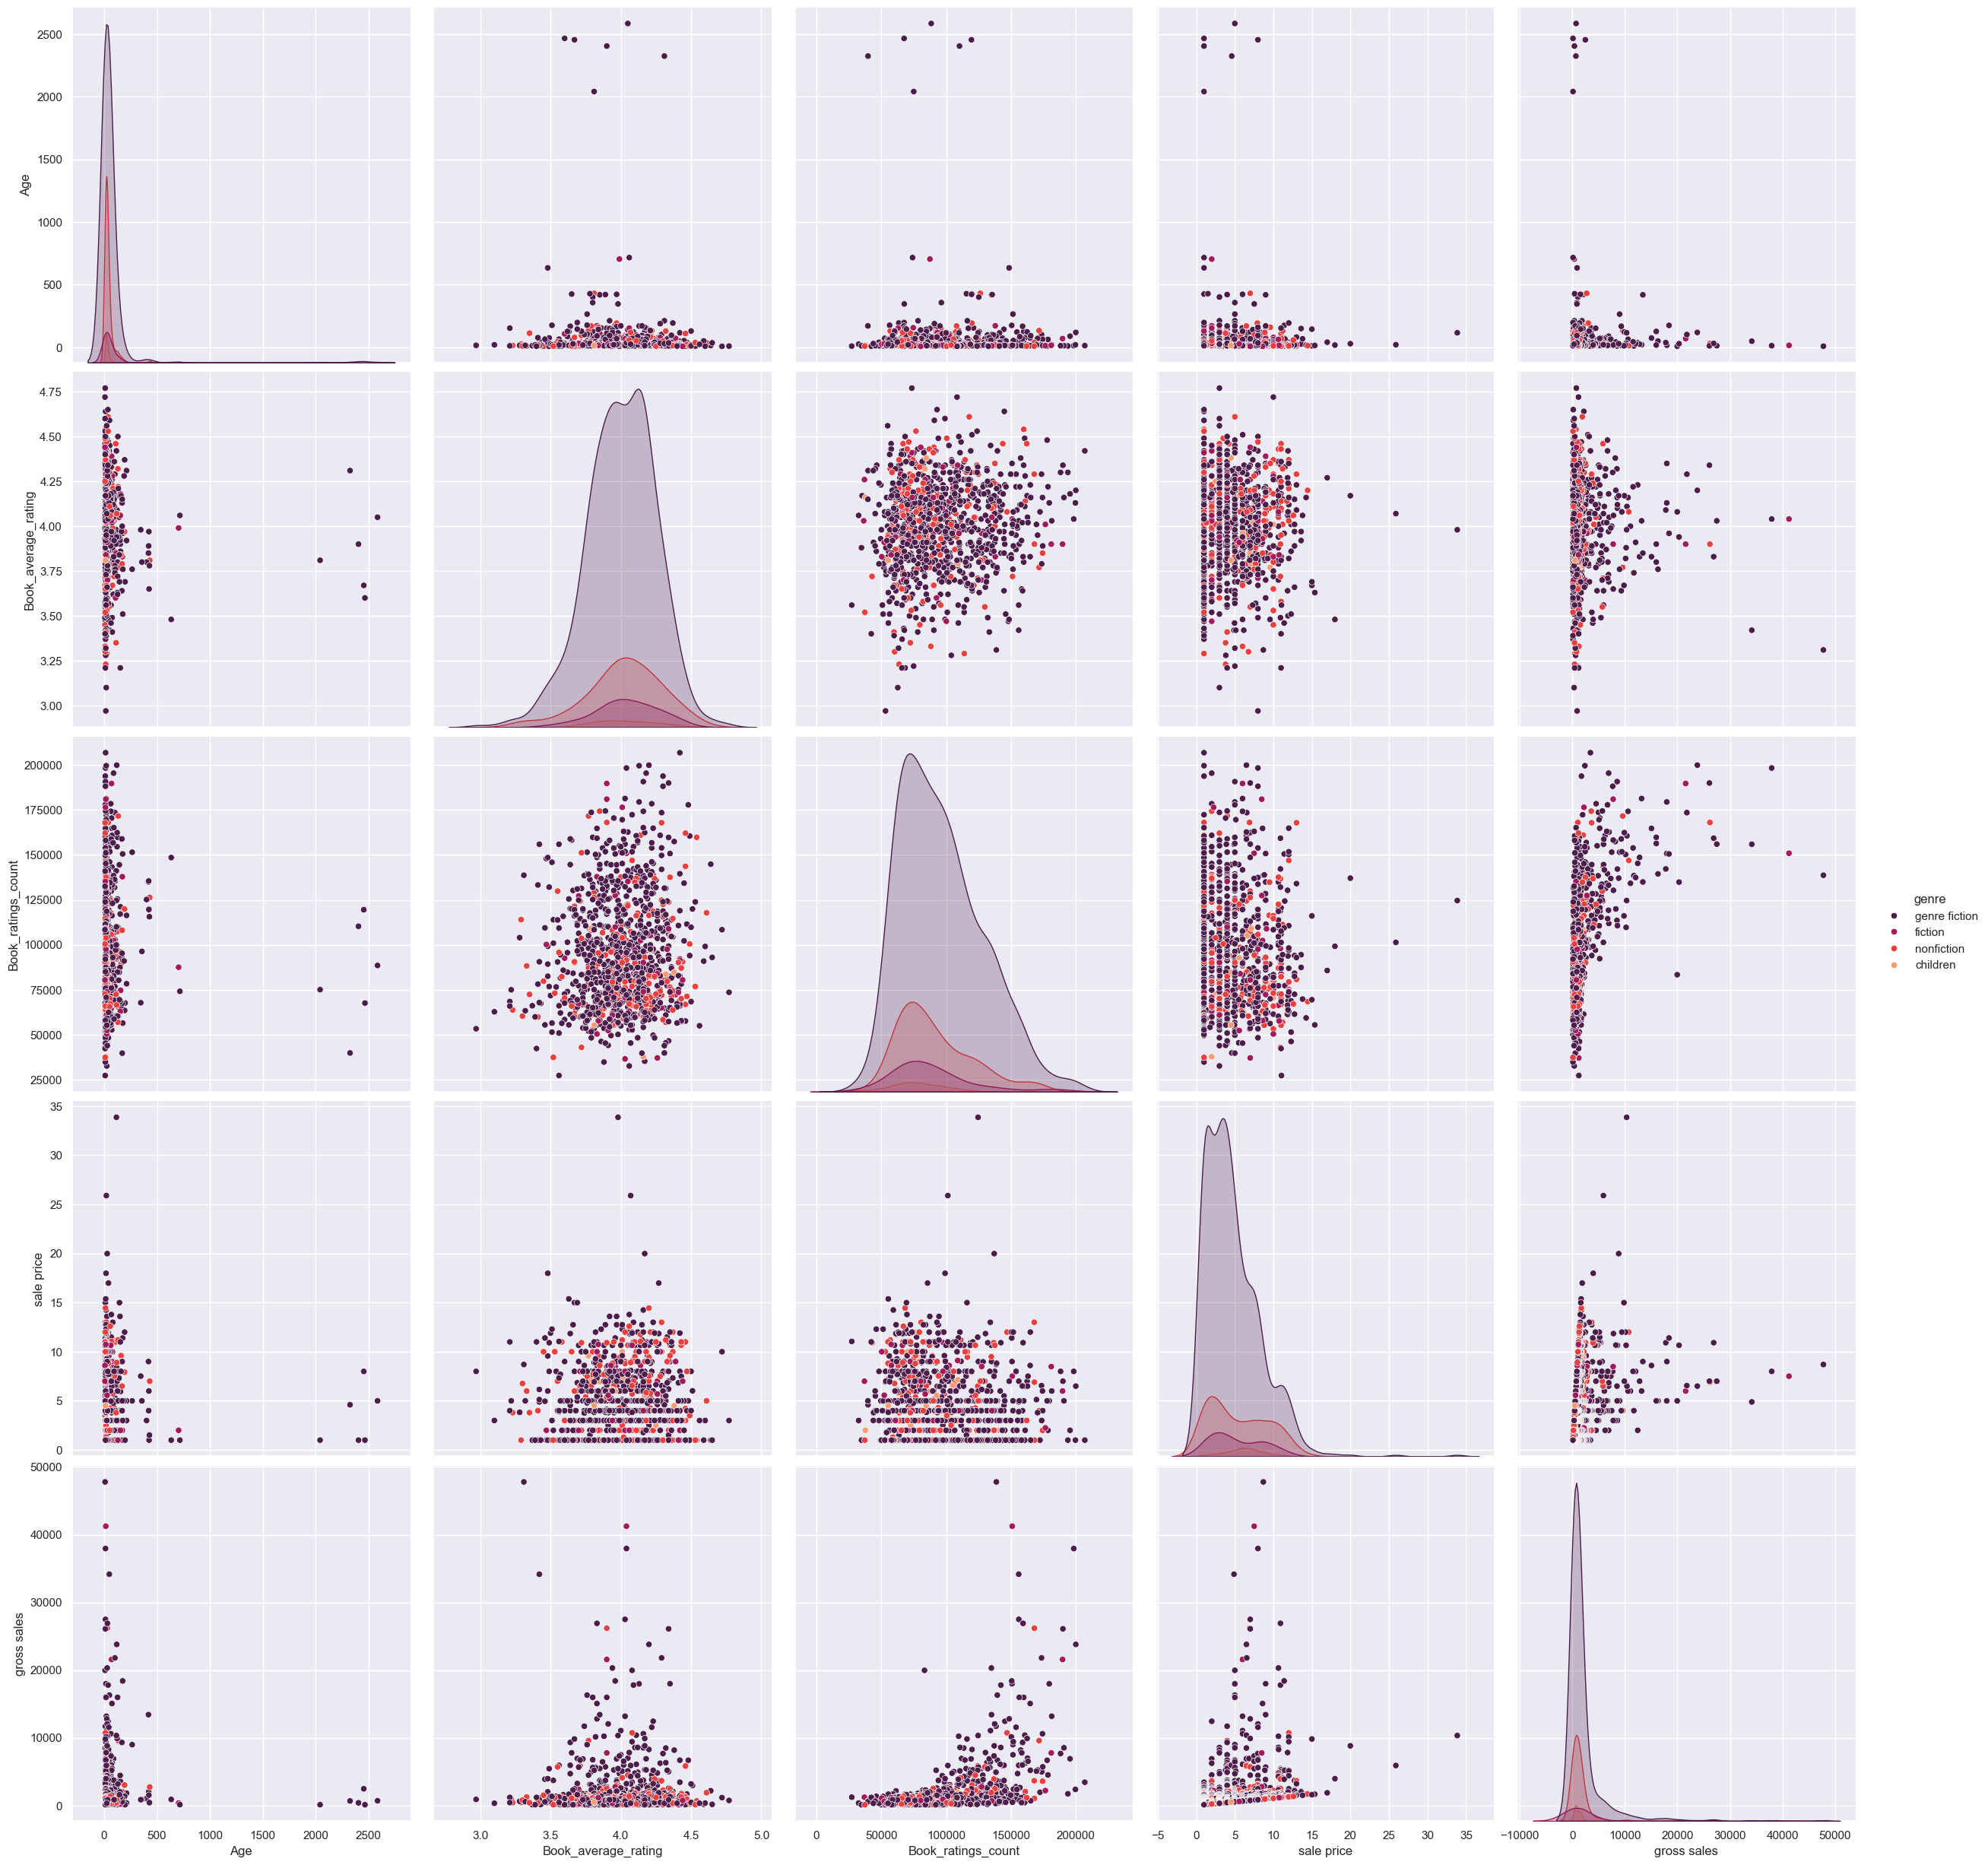

In [93]:
# визуализируем распределение целевой переменной по отношению к числовым признакам
fig = plt.figure(figsize=(10, 10))
sns.pairplot(data = classification_df[['Age', 'Book_average_rating', 'Book_ratings_count', 'sale price', 'gross sales', 'genre']],
              hue ='genre', palette = 'rocket', height=5);

Целевая переменная "Manual" преобладает в признаках. Исключение "Price(Euro) - тут преобладает "Automatic".

# 3.Выполните адекватную предварительную обработку данных

Выполните адекватную предварительную обработку данных разными методами. Разные методы означают стандартизацию, нормализацию и степенное преобразование для числовых признаков и порядковое/one-hot кодирование для категориальных.



* Разделим датасет на признаки и целевые метки

Для задачи классификации выделим признак 'Transmission' в отдельный целевой датасет. Остальные признаки будут данными для тренировки модели.

In [94]:
data = df.drop(columns = ['genre']) # признаках не нужен 'Transmission' - удаляем
target = df['genre'] # поскольку это целевая метка

Сразу скорректируем список категориальных признаков

In [95]:
cat_columns.remove('genre') # уберем Целевую метку из списка категориальных данных


In [96]:
cat_columns

['Author', 'language_code', 'Author_Rating', 'Publisher']

Приводим целевые метки к 0 и 1 (0 это 'Automatic', а 1 это 'Manual')



In [97]:
Label = prep.LabelEncoder()
Label.fit(target) # задаем столбец, который хотим преобразовать
Label.classes_ # в аттрибуте .classes_ хранится информация "какой класс как шифруется"
Label_encoded = Label.transform(target) # преобразуем и сохраняем в новую переменную
Label_encoded

array([2, 2, 2, ..., 2, 2, 2])

Разбиваем на тестовую и тренировочную выборку.

In [98]:
X_train, X_val, y_train, y_val = train_test_split(data,Label_encoded, test_size = 0.2, random_state = RANDOM_STATE)

* Выполним нормализацию и порядковое/one-hot кодирование.

* Создаем объект `Pipeline`

На вход ему подаем список из того, что мы хотим объединить в формате:
строка- название (даем имя Объекту)
сам объект (с заданными аргументами, если необходимо)

Сначала создадим отдельно Pipeline для числовых данных

In [99]:
# Pipeline предобработки числовых данных - нормализация
numerical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),

    ('scaler', MinMaxScaler())

])

In [100]:
numerical_pipe

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', MinMaxScaler())])

Теперь для категориальных

In [101]:
categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent', )),
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])

In [102]:
categorical_pipe

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder',
                 OneHotEncoder(drop='if_binary', handle_unknown='ignore',
                               sparse_output=False))])

* Объединяем в единый Трансформер Колонок Данных

Объект `ColumnTransformer` имеет в целом схожий синтаксис с `Pipeline`

т.е. на вход ему также подаем список из того, что мы хотим объединить в формате:

* строка - название (даем имя Объекту)
* сам объект (в этом случае подаем объекты Pipeline)
* добавляется еще список названий столбцов, к которым мы применяем эти преобразования


In [103]:
preprocessors = ColumnTransformer(transformers=[ # передадим пайплайны для объединения в один процесс
    ('num', numerical_pipe, num_columns),
    ('cat', categorical_pipe, cat_columns)
])

In [104]:
preprocessors

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', MinMaxScaler())]),
                                 ['Age', 'Book_average_rating',
                                  'Book_ratings_count', 'gross sales',
                                  'sale price']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Author', 'language_code', 'Author_Rating',
                                  'Publisher'])])

# 4.Разделите данные на тренировочную и валидационную выборку.

Разделите данные на тренировочную и валидационную выборку. Определитесь с метриками, по которым вы будете оценивать модель. Учитывайте дисперсию целевой переменной.

Данные на тренировочные и валидационные мы уже разбили. Определимся с метриками.

Создаем функции метрик для оценки модели.

In [105]:
def accuracy(model_pipe, X, y):
  y_model = model_pipe.predict(X)
  return accuracy_score(y, y_model)

def recall(model_pipe, X, y):
  y_model = model_pipe.predict(X)
  return recall_score(y, y_model)

Обучаем стандартно через `.fit()`

Тут важно, что на вход мы подаем датафреймы, т.к. в них есть колонки к которым мы обращаемся по именам. Внимательно следите за названиями колонок, он проверяет всё добуквенно

In [106]:
preprocessors.fit(X_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', MinMaxScaler())]),
                                 ['Age', 'Book_average_rating',
                                  'Book_ratings_count', 'gross sales',
                                  'sale price']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Author', 'language_code', 'Author_Rating',
                                  'Publisher'])])

* Проверим, что трансформер колонок работает.

Чисто в тестовых и ознакомительных целях посмотрим на датасет после преобразования.

In [107]:
cat_ohe_names = preprocessors.transformers_[1][1]['encoder'].get_feature_names_out(cat_columns)
cat_ohe_names

array(['Author_A.A. Milne, Ernest H. Shepard', 'Author_A.S.A. Harrison',
       'Author_Abbi Glines', 'Author_Adam Johnson',
       'Author_Agatha Christie',
       'Author_Agatha Christie, Î¡Î¿Î¶Î¯Ï„Î± Î£ÏŽÎºÎ¿Ï…',
       'Author_Alan Brennert',
       'Author_Alan Moore, Brian Bolland, Tim Sale',
       'Author_Albert Camus, Stuart Gilbert',
       'Author_Aldous Huxley, Christopher Hitchens',
       'Author_Aleksandr Solzhenitsyn, H.T. Willetts',
       'Author_Alex Flinn', 'Author_Alex Garland', 'Author_Alex Haley',
       'Author_Alexandra Bracken', 'Author_Alice Clayton',
       'Author_Alison Bechdel',
       'Author_Allen Ginsberg, William Carlos Williams',
       'Author_Allie Brosh', 'Author_Ally Carter', 'Author_Ally Condie',
       'Author_Amanda Hocking', 'Author_Amish Tripathi',
       'Author_Amor Towles', 'Author_Amy Tan', 'Author_Andre Dubus III',
       'Author_Andrew Clements, Brian Selznick', 'Author_Angie Sage',
       'Author_Anita Diamant', 'Author_Anita Shreve',

Выполняем преобразование тренировочных данных.


In [108]:
train_data = preprocessors.transform(X_train) # преобразуем данные
columns = np.append(num_columns, cat_ohe_names) # объединяем названия колонок
pd.DataFrame(train_data, columns=columns,) #смотрим на датафрейм

,Age,Book_average_rating,Book_ratings_count,gross sales,sale price,"Author_A.A. Milne, Ernest H. Shepard",Author_A.S.A. Harrison,Author_Abbi Glines,Author_Adam Johnson,Author_Agatha Christie,...,Author_Rating_Intermediate,Author_Rating_Novice,"Publisher_Amazon Digital Services, Inc.",Publisher_Hachette Book Group,Publisher_HarperCollins Christian Publishing,Publisher_HarperCollins Publishers,Publisher_Macmillan,Publisher_Penguin Group (USA) LLC,Publisher_Random House LLC,Publisher_Simon and Schuster Digital Sales Inc
0,0.015466,0.725610,0.383435,0.015951,0.060846,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.023606,0.609756,0.454683,0.029738,0.212960,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.003663,0.518293,0.218452,0.005996,0.060846,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.031746,0.701220,0.261909,0.011730,0.121692,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.003256,0.542683,0.109623,0.032947,0.343779,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851,0.001221,0.768293,0.618402,0.082346,0.365075,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
852,0.045177,0.664634,0.381939,0.014351,0.085184,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
853,0.004070,0.640244,0.786641,0.169629,0.198053,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
854,0.003256,0.530488,0.175726,0.027591,0.296623,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Аналогично с валидационными.

In [109]:
val_data = preprocessors.transform(X_val)
pd.DataFrame(val_data, columns=columns,)

,Age,Book_average_rating,Book_ratings_count,gross sales,sale price,"Author_A.A. Milne, Ernest H. Shepard",Author_A.S.A. Harrison,Author_Abbi Glines,Author_Adam Johnson,Author_Agatha Christie,...,Author_Rating_Intermediate,Author_Rating_Novice,"Publisher_Amazon Digital Services, Inc.",Publisher_Hachette Book Group,Publisher_HarperCollins Christian Publishing,Publisher_HarperCollins Publishers,Publisher_Macmillan,Publisher_Penguin Group (USA) LLC,Publisher_Random House LLC,Publisher_Simon and Schuster Digital Sales Inc
0,0.005291,0.737805,0.380404,0.000419,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.031339,0.652439,0.331361,0.000575,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.046805,0.731707,0.782695,0.258561,0.182537,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.024420,0.664634,0.246326,0.036913,0.389109,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.018315,0.634146,0.185363,0.006312,0.060846,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,0.001628,0.597561,0.311090,0.027666,0.181016,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
210,0.061864,0.731707,0.223639,0.021294,0.212960,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
211,0.001628,0.707317,0.287244,0.033880,0.121692,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
212,0.018315,0.780488,0.339439,0.001753,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Посмотрим размерности созданных выборок

In [110]:
# Посмотрим размерности созданных выборок
display(X_train.shape)
display(X_val.shape)
display(y_train.shape)
display(y_val.shape)

(856, 9)

(214, 9)

(856,)

(214,)

# 5.Выберите модель машинного обучения.

Выберите модель машинного обучения. Это должна быть модель логистической регрессии.

* Классификация Методом Логистической регрессии

In [111]:
pipe = Pipeline([
    ('preprocessors', preprocessors),
    ('model', LogisticRegression(C=0.001, random_state=42))
])

In [112]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessors',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'Book_average_rating',
                                                   'Book_ratings_count',
                                                   'gross sales',
                                                   'sale price']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Author', 'language_code',
                                                   'Author_Rating',
                                                   'Publisher'])])),
                ('model', LogisticRegression(C=0.001, random_state=42))])

In [113]:
print(f"accuracy на тренировочной выборке: {accuracy(pipe, X_train, y_train):.4f}")
print(f"accuracy на валидационной выборке: {accuracy(pipe, X_val, y_val):.4f}")

accuracy на тренировочной выборке: 0.7593
accuracy на валидационной выборке: 0.8037


In [114]:
print(f"recall на тренировочной выборке: {recall(pipe, X_train, y_train):.4f}")
print(f"recall на валидационной выборке: {recall(pipe, X_val, y_val):.4f}")

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

## Вывод

Исходя из этих данных, можно сделать вывод, что модель неплохо обучилась. Если добавить новые параметры, то точность на валидационной выборке будет лучше.